In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
class bayesian_inference:
    def __init__(self) -> None:
        """
        Variables and distributions.

        Returns
        -------
        None.

        """
        mu = np.linspace(1.65, 1.8, num = 50)
        self.mu=mu
        uniform_dist = sts.uniform.pdf(mu) + 1 #sneaky advanced note: I'm using the uniform distribution for clarity, but we can also make the beta distribution look completely flat by tweaking alpha and beta!
        self.uniform_dist=uniform_dist
        beta_dist = sts.beta.pdf(mu, 2, 5, loc = 1.65, scale = 0.2) 
        self.beta_dist =beta_dist 

    def normalization(self, distr: float)-> float:
        """
        Normalize distributions. Array of float

        Parameters
        ----------
        distr : float
            Array of float64.

        Returns
        -------
        float
            Array of float64.

        """
        return distr/distr.sum()
    
    def beta_unif_plot(self)->plt.plot:
        """
        Beta and uniform distribution in the same plot

        Returns
        -------
        plt.plot
            Beta and uniform distributions plot.

        """
        plt.figure()
        plt.plot(self.mu, beta_dist, label = 'Beta Dist')
        plt.plot(self.mu, uniform_dist, label = 'Uniform Dist')
        plt.xlabel("Value of $\mu$ in meters")
        plt.ylabel("Probability density")
        return plt.legend()
    
    def likelihood_func(self, datum: float, mu: int)->float and plt.plot:
        """
        Return normalized likelihood and normalized likelihood plot.

        Parameters
        ----------
        datum : Float
            Normal distribution mean.
            
        mu : Int
            Amount of data.

        Returns
        -------
        norm_likelihood : Array of float64
            Normalized likelihood distribution.
        plot_show: plt.plot
            Probability likelihood plot.

        """
        likelihood_out = sts.norm.pdf(datum, mu, scale = 0.1) #Note that mu here is an array of values, so the output is also an array!
        norm_likelihood=likelihood_out/likelihood_out.sum()
        plt.plot(mu, norm_likelihood)
        plt.plot(mu, beta_dist, label = 'Beta Dist')
        plt.plot(mu, uniform_dist, label = 'Uniform Dist')
        plt.title("Likelihood of $\mu$ given observation 1.7m")
        plt.ylabel("Probability Density/Likelihood")
        plt.xlabel("Value of $\mu$")
        return norm_likelihood,plt.show()
    
    def unnorm_posterior(self, likelihood: float , prior: float )->float and plt.plot:
        """
        Parameters
        ----------
        likelihood : Array of float64
            Data distribution.
        prior : Array of float64
            Parameter distribution.

        Returns
        -------
        unnormalized_posterior : Array of float64
            Unnormalized posterior distribution data.
        plt.plot
            Unnormalized_posterior plot.

        """
        unnormalized_posterior = likelihood * prior
        plt.figure()
        plt.plot(self.mu, unnormalized_posterior)
        plt.xlabel("$\mu$ in meters")
        plt.ylabel("Unnormalized Posterior")
        return unnormalized_posterior, plt.show()
    
    def norm_posterior(self, unm_posterior: float)->float and plt.plot:
        """
        This function use sp.integrate.trapz: Cumulatively integrate y(x) using the composite trapezoidal rule. With this we approach the real function
        with the posterior one.

        Parameters
        ----------
        unm_posterior : Array of float64.
            Unnormalized posterior distribution.

        Returns
        -------
        normalized_posterior : Array of float64
            Normalized posterior distribution.
        plt.show()
            Show the normalized posterior distribution.

        """
        p_data = sp.integrate.trapz(unnormalized_posterior, self.mu)
        normalized_posterior = unnormalized_posterior/(p_data)
        plt.plot(self.mu, normalized_posterior)
        plt.xlabel("$\mu$ in meters")
        plt.ylabel("Probability Density")
        return normalized_posterior,plt.show()
    
    def posterior_plot(self, var: float)->None:
        """
        This function makes better approximations the more data it have. Then makes a normalized posterior distribution plot.

        Parameters
        ----------
        var : Array of float64
            A distribution is inserted, which is later of type normal or Gaussian.

        Returns
        -------
        None
            Normalized posterior distribution plot.

        """
        prior = uniform_dist
        plt.figure(figsize = (10, 8))
        for ind, datum in enumerate(var):
          likelihood = likelihood_out
          unnormalized_posterior = prior * likelihood 
          normalized_posterior = unnormalized_posterior/sp.integrate.trapz(unnormalized_posterior, self.mu)
          prior = normalized_posterior #Posterior predictive distribution not prior
          posterior_dict[ind] = normalized_posterior
          if ind%200 == 0:
            plt.plot(self.mu, normalized_posterior, label = f'Model after observing {ind} data')
        plt.legend()
        plt.show()
    
    def compute_percentile(self, parameter_values: float, distribution_values: float, percentile: float)->list:
        """
        This function gives a sorted parameters value 

        Parameters
        ----------
        parameter_values : Array of float64
            We use mu values.
        distribution_values : Array of float64
            We use posterior distribution.
        percentile : Float
            Percentile: 5% and 99%.

        Returns
        -------
        list
            Sorted index list.

        """
        cumulative_distribution = sp.integrate.cumtrapz(
            distribution_values, parameter_values)
        percentile_index = np.searchsorted(cumulative_distribution, percentile)
        return parameter_values[percentile_index]
    
    def convergence_confidence_plot(self)->None:
        """
        We can se in this function plot, how the posterior distribution converges to the real value.

        Returns
        -------
        None
            Posterior distribution plot

        """
        top_bound = means = [self.compute_percentile(self.mu, posterior_dict[i], 0.995) for i in range(20, 1001, 20)]
        bottom_bound = means = [self.compute_percentile(self.mu, posterior_dict[i], 0.005) for i in range(20, 1001, 20)]
        means = [self.compute_percentile(self.mu, posterior_dict[i], 0.5) for i in range(20, 1001, 20)]
        plt.figure(figsize = (12, 8))
        plt.axhline(y=1.7, ls = '--', color = 'Yellow', label = 'True Mean')
        plt.plot(range(20, 1001, 20), top_bound, label = 'top bound')
        plt.plot(range(20, 1001, 20), bottom_bound, label = 'bottom bound')
        plt.plot(range(20, 1001, 20), means, label = 'means')
        plt.legend()
        plt.title('Model Convergence with More Data')
        plt.xlabel("Number of Data")
        plt.ylabel("Predicted Mean $\mu$")
        plt.figure()
        plt.plot(self.mu, posterior_dict[1000], label = 'Final Posterior Model')
        plt.axvline(x = self.compute_percentile(self.mu, posterior_dict[1000], 0.005), ls = '--', color = 'y', label = '99% Conf Int')
        plt.axvline(x = self.compute_percentile(self.mu, posterior_dict[1000], 0.995), ls = '--', color = 'y')
        plt.legend()
    
    def quantiles_confidence(self)->None:
        """
        This function makes confidence intervals plot.

        Returns
        -------
        None
            Print confidence intervals and confidence intervals plots.

        """
        model=sts.norm(loc=1.699, scale=0.1)
        sum(model.rvs(size=100)>1.75)
        results = model.rvs(size = [100, 100])
        results_sum = (results > 1.75).sum(axis = 1)
        plt.figure()
        plt.hist(results_sum, edgecolor = 'black', color = 'cornflowerblue')
        results = model.rvs(size = [100, 100])
        results_sum = (results > 1.75).sum(axis = 1)
        lower_bound = np.quantile(results_sum, 0.005)
        upper_bound = np.quantile(results_sum, 0.995)
        plt.figure()
        plt.hist(results_sum, edgecolor = 'black', color = 'cornflowerblue')
        plt.axvline(x = lower_bound, color = 'y', ls = '--')
        plt.axvline(x = upper_bound, color = 'y', ls = '--')
        print('Our 99% confidence interval lower bound is:', lower_bound)
        print('Our 99% confidence interval upper bound is:', upper_bound)

In [3]:
bayesian=bayesian_inference()

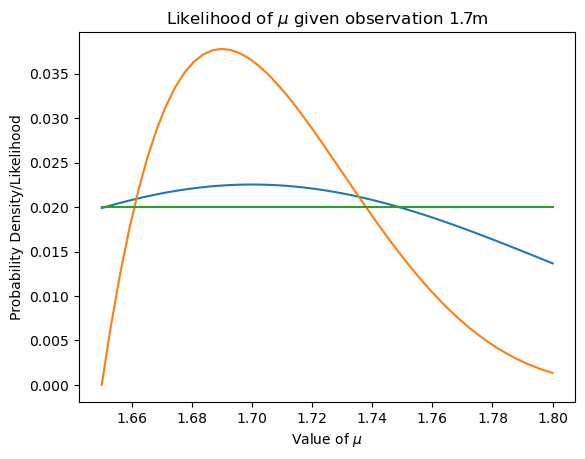

In [4]:
uniform_distribution=bayesian.uniform_dist
beta_distribution=bayesian.beta_dist
uniform_dist=bayesian.normalization(uniform_distribution)
beta_dist=bayesian.normalization(beta_distribution)
likelihood_out, likelihood_plot = bayesian.likelihood_func(1.7, bayesian.mu)

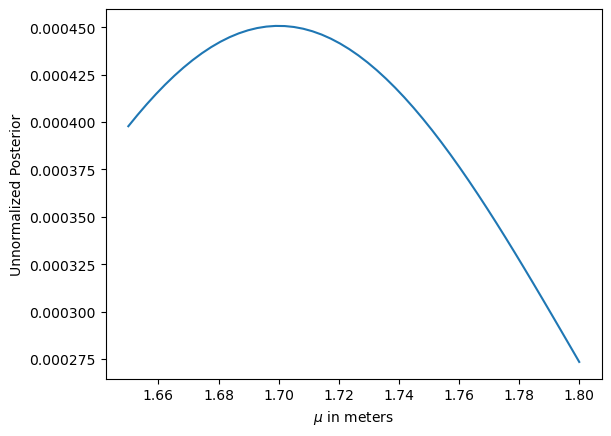

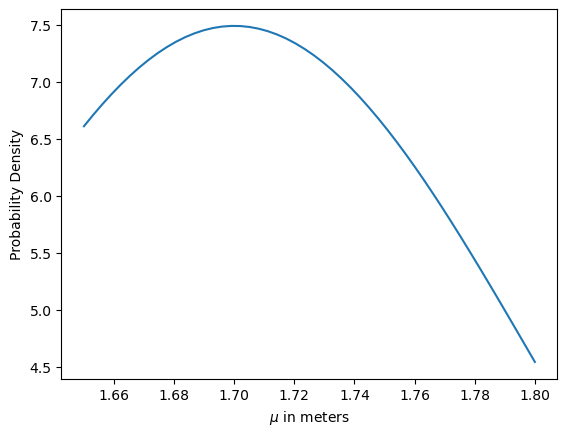

In [5]:
unnormalized_posterior, unnorm_posterior_plot=bayesian.unnorm_posterior(likelihood_out,uniform_dist)
normalized_posterior, norm_post_plot=bayesian.norm_posterior(unnormalized_posterior)
heights_data = sts.norm.rvs(loc = 1.7, scale = 0.1, size = 1001)

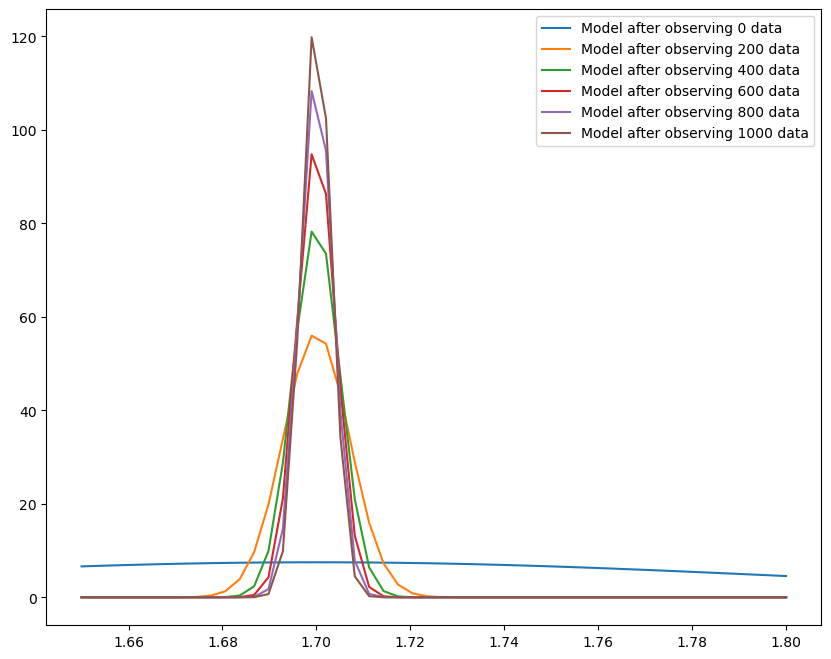

In [6]:
prior = uniform_dist
posterior_dict = {}
bayesian.posterior_plot(heights_data)

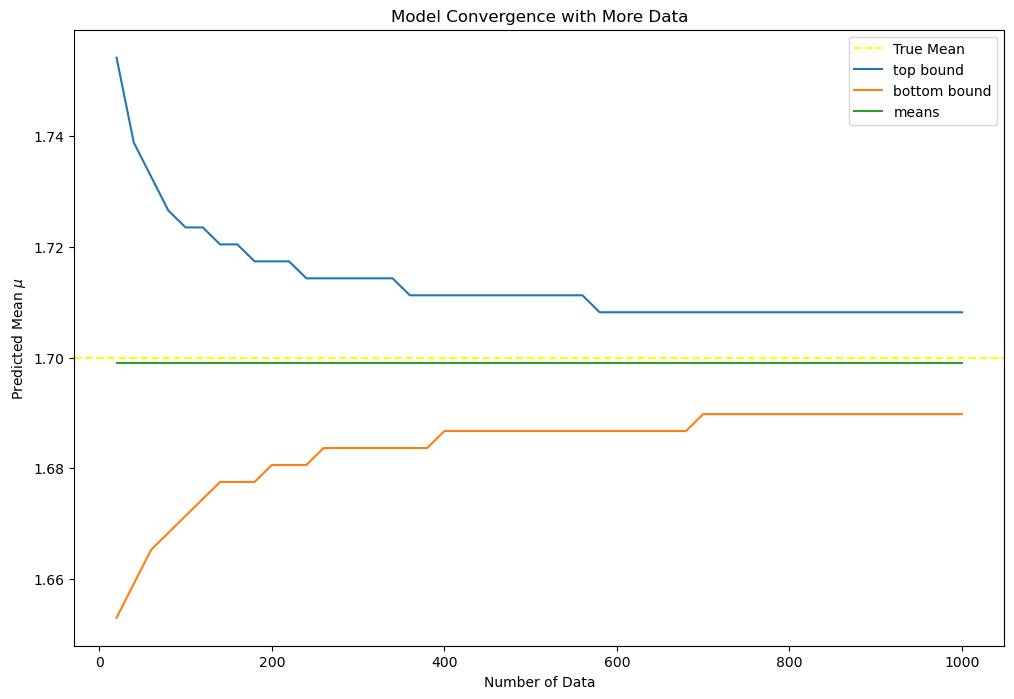

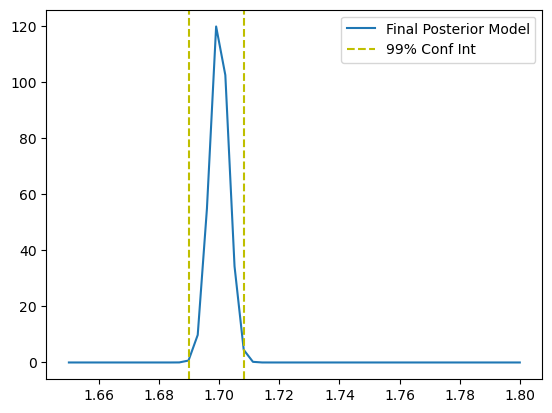

In [7]:
bayesian.convergence_confidence_plot()

Our 99% confidence interval lower bound is: 16.485
Our 99% confidence interval upper bound is: 40.00999999999999


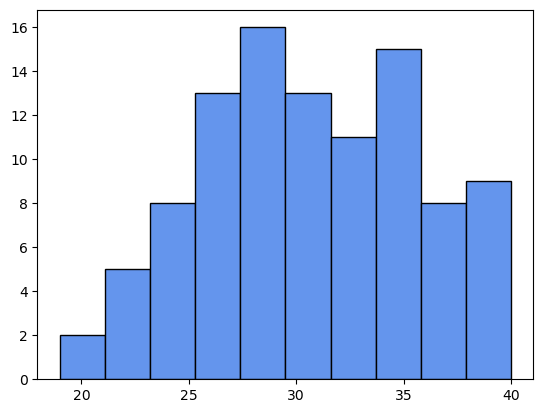

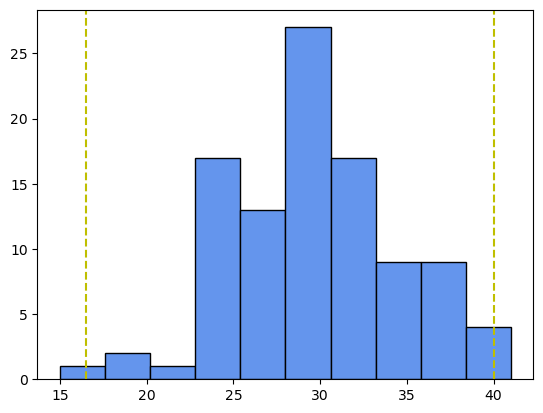

In [8]:
bayesian.quantiles_confidence()